<h3> LAB 13 - Detec$çã$o de Sons (DTMF)</h3>
<h5> Processamento Digital de Sinais I - TE352 </h5>
<h5> Leonardo Barbosa da Silva GRR20162855 </h5> 

In [1]:
# Inicializa os pacotes que serão utilizados
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
from IPython.display import Audio
from operator import itemgetter

Objetivo: Detecção de Tom multifrequencial (DTMF-Dual Tone Multi-Frequency )

1) Considere o tons do sistema de sinalização DTMF de telefonia, cujas frequencias estão na tabela abaixo.

|      |1209 Hz|1336 Hz|1477 Hz|1633 Hz| 
|:----:|:-----:|:-----:|:-----:|:-----:|
|697 Hz|   1   |   2   |   3   |   A   | 
|770 Hz|   4   |   5   |   6   |   B   | 
|852 Hz|   7   |   8   |   9   |   C   | 
|941 Hz|   *   |   0   |   #   |   D   | 

2) Gerar uma matriz f (12x2), contendo em cada linha a frequencia o par de frequencias correspondente as teclas '1, 2, 3, 4, 5, 6, 7, 8, 9, *, 0, #'. Ignore a quarta coluna (A,B,C,D). 

In [2]:
f = [[697, 1209],
     [697, 1336],
     [697, 1477],
     [770, 1209],
     [770, 1336],
     [770, 1477],
     [852, 1209],
     [852, 1336],
     [852, 1477],
     [941, 1209],
     [941, 1336],
     [941, 1477],]

3) Gerar uma matriz tones (400x16), contendo os sinais relativos às teclas. Considere taxa de amostragem Fs=8000. Visualize os sinais das teclas 1 2 3 e 4 (subplot(2,2,1)).

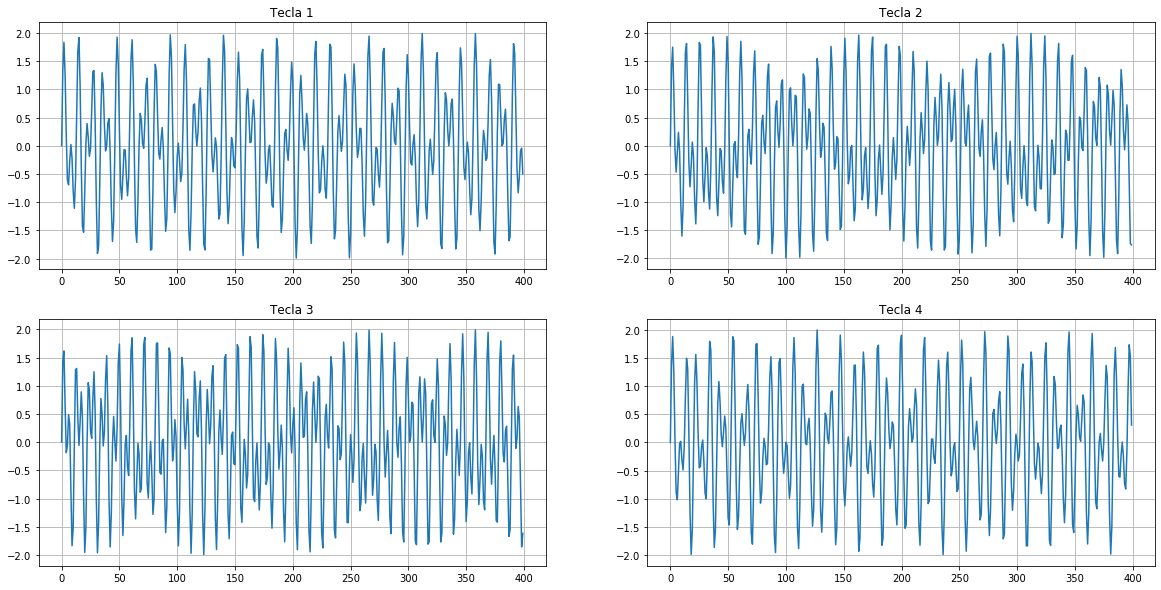

In [3]:
t = 0.05                   
n = np.linspace(0, t, 400)                        
   
tecla_0 = np.sin(2 * np.pi * 1336 * n) + np.sin(2 * np.pi * 941 * n)

tecla_1 = np.sin(2 * np.pi * 1209 * n) + np.sin(2 * np.pi * 697 * n)

tecla_2 = np.sin(2 * np.pi * 1336 * n) + np.sin(2 * np.pi * 697 * n)

tecla_3 = np.sin(2 * np.pi * 1477 * n) + np.sin(2 * np.pi * 697 * n)

tecla_4 = np.sin(2 * np.pi * 1209 * n) + np.sin(2 * np.pi * 770 * n)

tecla_5 = np.sin(2 * np.pi * 1336 * n) + np.sin(2 * np.pi * 770 * n)

tecla_6 = np.sin(2 * np.pi * 1477 * n) + np.sin(2 * np.pi * 770 * n)

tecla_7 = np.sin(2 * np.pi * 1209 * n) + np.sin(2 * np.pi * 852 * n)
 
tecla_8 = np.sin(2 * np.pi * 1336 * n) + np.sin(2 * np.pi * 852 * n)
 
tecla_9 = np.sin(2 * np.pi * 1477 * n) + np.sin(2 * np.pi * 852 * n)

tecla_asterisco = np.sin(2 * np.pi * 1209 * n) + np.sin(2 * np.pi * 941 * n)

tecla_jogodavelha = np.sin(2 * np.pi * 1477 * n) + np.sin(2 * np.pi * 941 * n)
 
tecla_A = np.sin(2 * np.pi * 1633 * n) + np.sin(2 * np.pi * 697 * n)

tecla_B = np.sin(2 * np.pi * 1633 * n) + np.sin(2 * np.pi * 770 * n)

tecla_C = np.sin(2 * sp.pi * 1633 * n) + np.sin(2 * sp.pi * 852 * n)

tecla_D = np.sin(2 * np.pi * 1633 * n) + np.sin(2 * np.pi * 941 * n)

tones = np.transpose([tecla_0, tecla_1, tecla_2, tecla_3, tecla_4, tecla_5, tecla_6,
                  tecla_7, tecla_8, tecla_9, tecla_asterisco, tecla_jogodavelha,
                  tecla_A, tecla_B, tecla_C, tecla_D]) 

plt.figure(figsize = (20, 10))
plt.subplot(2, 2, 1)
plt.grid()
plt.title('Tecla 1')
plt.plot(tones[:, 1])
plt.subplot(2, 2, 2)
plt.grid()
plt.title('Tecla 2')
plt.plot(tones[:, 2])
plt.subplot(2, 2, 3)
plt.grid()
plt.title('Tecla 3')
plt.plot(tones[:, 3])
plt.subplot(2, 2, 4)
plt.grid()
plt.title('Tecla 4')
plt.plot(tones[:, 4])
plt.show()

4) Escute os tons, gerados pelo telefone 33613229.
for i=[3 3 6 1 3 2 2 9], 
p = audioplayer(tones(:,i),Fs); 
play(p) pause(0.5)
end 

In [4]:
teclas = np.transpose(np.concatenate((tones[:, 3], 
                                      tones[:, 3], 
                                      tones[:, 6], 
                                      tones[:, 1], 
                                      tones[:, 3], 
                                      tones[:, 2],
                                      tones[:, 2], 
                                      tones[:, 9])))

Audio(data = teclas, rate = 8000)

5) Calcule a DFT dos sinais e plot numa figura (subplot(3,3,1)), os espectros (valor absoluto), das teclas 1 a 9. 

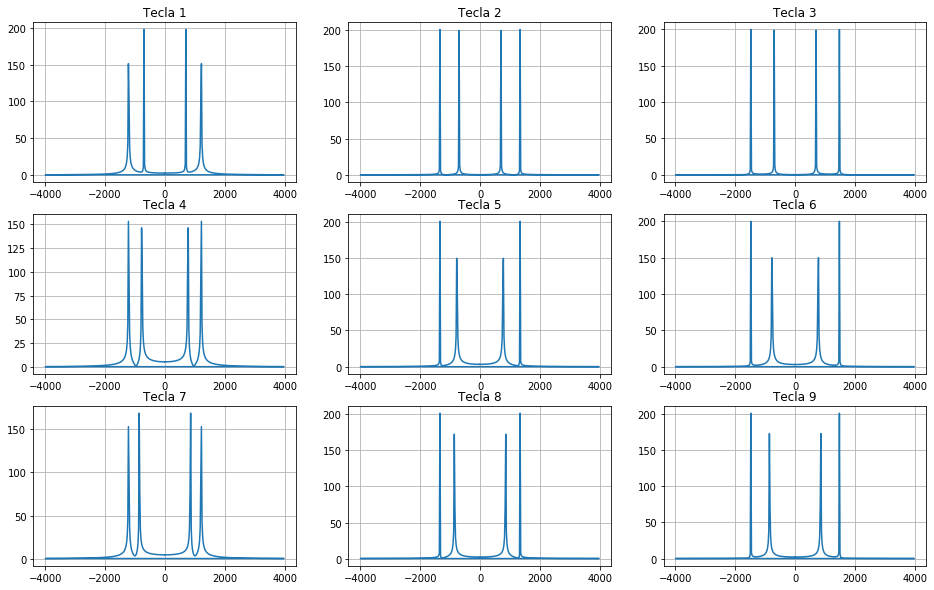

In [5]:
N = 400
Fs = 8000
xf = np.fft.fftfreq(N, 1/Fs)

plt.figure(figsize = (16, 10))
plt.subplot(3,3,1)
plt.grid()
plt.title('Tecla 1')
plt.plot(xf, abs(np.fft.fft(tecla_1)))
plt.subplot(3, 3, 2)
plt.grid()
plt.title( 'Tecla 2')
plt.plot(xf, abs(np.fft.fft(tecla_2)))
plt.subplot(3, 3, 3)
plt.grid()
plt.title('Tecla 3')
plt.plot(xf, abs(np.fft.fft(tecla_3)))

plt.subplot(3,3,4)
plt.grid()
plt.title('Tecla 4')
plt.plot(xf, abs(np.fft.fft(tecla_4)))
plt.subplot(3, 3, 5)
plt.grid()
plt.title( 'Tecla 5')
plt.plot(xf, abs(np.fft.fft(tecla_5)))
plt.subplot(3, 3, 6)
plt.grid()
plt.title('Tecla 6')
plt.plot(xf, abs(np.fft.fft(tecla_6)))

plt.subplot(3,3,7)
plt.grid()
plt.title('Tecla 7')
plt.plot(xf, abs(np.fft.fft(tecla_7)))
plt.subplot(3, 3, 8)
plt.grid()
plt.title( 'Tecla 8')
plt.plot(xf, abs(np.fft.fft(tecla_8)))
plt.subplot(3, 3, 9)
plt.grid()
plt.title('Tecla 9')
plt.plot(xf, abs(np.fft.fft(tecla_9)))


6) Faça uma função que calcule as duas frequencias de maior amplitude do sinal. Compare os valores obtidos com os valores original (imprima a diferença).

In [10]:
tecla_4 = np.fft.fftshift(np.fft.fft(tecla_4))
xf = np.fft.fftfreq(N, 1/Fs)
xf = np.fft.fftshift(xf)

def Calc_Frequencias(data):
    sinal_teste = sp.array(list(zip(xf, abs(np.fft.fftshift(np.fft.fft(data)))))) 
    
    for i in range(0, len(sinal_teste)):
        if any(sinal_teste[i] < 0):
            sinal_teste[i] = 0
    
    maxf1 = max(sinal_teste, key = itemgetter(1))[0]
    
    for i in range(0, len(sinal_teste)):
        if any(sinal_teste[i] == maxf1):
            sinal_teste[i] = 0
    
    maxf2 = max(sinal_teste, key = itemgetter(1))[0]
    
    return maxf1, maxf2

freq1, freq2 = Calc_Frequencias(tecla_4)

print('Tecla 4\n'
      'Frequência alvo: 1209 Hz; Frequência obtida: {f1} Hz\n'
      'Frequência alvo: 770 Hz; Frequência obtida: {f2} Hz'.format(f1 = freq1, f2 = freq2))

Tecla 4
Frequência alvo: 1209 Hz; Frequência obtida: 1220.0 Hz
Frequência alvo: 770 Hz; Frequência obtida: 780.0 Hz


7) Repita o item 6, mas utilize o algoritmo de Goertzel. (goertzel())

<b>R: </b> Como Python não possui nativamente a função Goertzel, foi pesquisado em fóruns se alguém já havia criado uma função em Python3 equivalente a do MATLAB.

No site https://gist.github.com/sebpiq/4128537 foi encontrado o seguinte código.

Obs: As funções plotadas foram adaptadas do site acima para que ele fique coerente com o exercício sendo realizado.

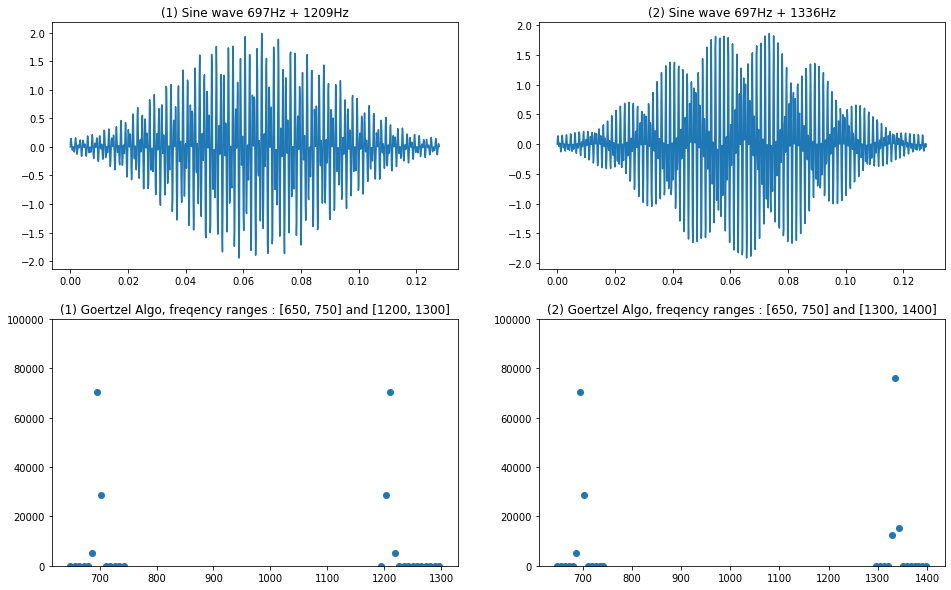

In [7]:
import math

def goertzel(samples, sample_rate, *freqs):
    """
    Implementation of the Goertzel algorithm, useful for 
    calculating individual
    terms of a discrete Fourier transform.
    
    `samples` is a windowed one-dimensional signal originally 
    sampled at `sample_rate`.
    
    The function returns 2 arrays, one containing the actual 
    frequencies calculated,
    the second the coefficients `(real part, imag part, power)` for 
    each of those frequencies.
    
    For simple spectral analysis, the power is usually enough.
    Example of usage :
        
        freqs, results = goertzel(some_samples, 44100, (400, 500), (1000, 1100))
    """
    window_size = len(samples)
    f_step = sample_rate / float(window_size)
    f_step_normalized = 1.0 / window_size

    # Calculate all the DFT bins we have to compute to include frequencies
    # in `freqs`.
    bins = set()
    for f_range in freqs:
        f_start, f_end = f_range
        k_start = int(math.floor(f_start / f_step))
        k_end = int(math.ceil(f_end / f_step))

        if k_end > window_size - 1:
            raise ValueError('frequency out of range %s' % k_end)
        bins = bins.union(range(k_start, k_end))

    # For all the bins, calculate the DFT term
    n_range = range(0, window_size)
    freqs = []
    results = []
    for k in bins:

        # Bin frequency and coefficients for the computation
        f = k * f_step_normalized
        w_real = 2.0 * math.cos(2.0 * math.pi * f)
        w_imag = math.sin(2.0 * math.pi * f)

        # Doing the calculation on the whole sample
        d1, d2 = 0.0, 0.0
        for n in n_range:
            y  = samples[n] + w_real * d1 - d2
            d2, d1 = d1, y

        # Storing results `(real part, imag part, power)`
        results.append((
            0.5 * w_real * d1 - d2, w_imag * d1,
            d2**2 + d1**2 - w_real * d1 * d2)
        )
        freqs.append(f * sample_rate)
    return freqs, results


if __name__ == '__main__':
    # quick test
    import numpy as np
    import pylab

    # generating test signals
    SAMPLE_RATE = 8000
    WINDOW_SIZE = 1024
    t = np.linspace(0, 1, SAMPLE_RATE)[:WINDOW_SIZE]
    sine_wave = np.sin(2*np.pi*697*t) + np.sin(2*np.pi*1209*t)
    sine_wave = sine_wave * np.hamming(WINDOW_SIZE)
    sine_wave2 = np.sin(2*np.pi*697*t) + np.sin(2*np.pi*1336*t)
    sine_wave2 = sine_wave2 * np.hamming(WINDOW_SIZE)

    # applying Goertzel on those signals, and plotting results
    freqs, results = goertzel(sine_wave, SAMPLE_RATE, (650, 750),  (1200, 1300))
    
    plt.figure(figsize = (16, 10))
    pylab.subplot(2, 2, 1)
    pylab.title('(1) Sine wave 697Hz + 1209Hz')
    pylab.plot(t, sine_wave)

    pylab.subplot(2, 2, 3)
    pylab.title('(1) Goertzel Algo, freqency ranges : [650, 750] and [1200, 1300]')
    pylab.plot(freqs, np.array(results)[:,2], 'o')
    pylab.ylim([0,100000])

    freqs, results = goertzel(sine_wave2, SAMPLE_RATE, (650, 750),  (1300, 1400))

    pylab.subplot(2, 2, 2)
    pylab.title('(2) Sine wave 697Hz + 1336Hz')
    pylab.plot(t, sine_wave2)

    pylab.subplot(2, 2, 4)
    pylab.title('(2) Goertzel Algo, freqency ranges : [650, 750] and [1300, 1400]')
    pylab.plot(freqs, np.array(results)[:,2], 'o')
    pylab.ylim([0,100000])

    pylab.show()